# Just an elegent signal processing block
This book should give an idea of how we can optimize singal filtering. Meaning, if we just want to see certain frequency range, we should be able see exactly that range in frequency domain.

## Normal idea - 
Take the raw signal. 

RAW signal --> Low Pass filer --> High pass filter --> FFT --> you get the output where the frequencies between low-high range.

For Low pass and high pass filter, you usually perform convolution. Which is a computationally very expensive. Instead there is a better approach.

## Better Approach
RAW signal --> FFT --> You get the signal in freq domain --> Perform multiplication of siganl in freq doman with FFT of low pass coefficients ---> Perform multiplication of signal in freq domain with FFT of high pass coefficients --> You get the signal in FFT with all the frequencies removed.

The reason this works is because, 
### "CONVOLUTION IN TIME DOMAIN is same as MULTIPLICATION in FREQUENCY DOMAIN". 
This would drastically decrease the time taken.

In [2]:
# create a signal with 100hz and 200
print("Hello")
# print name


Hello


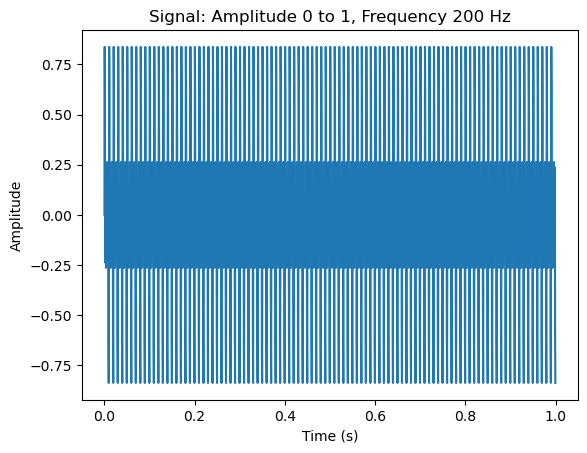

2000


In [6]:

# plot a signal
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
amplitude = 1.0
freq1 = 200  # Hz
freq2 = 300
freq3 = 400
freq4 = 500
duration = 1.0 # seconds
sampling_rate = 2000  # samples per second

# Time axis
# observing only 1/10th of a second
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
t_1_10th = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

# Generate the signal with different frequencies. We will filter out the signals in the next step.
signal1 = (amplitude/4) * (np.sin(2 * np.pi * freq1 * t)+np.sin(2 * np.pi * freq2 * t)+np.sin(2 * np.pi * freq3 * t)+np.sin(2 * np.pi * freq4 * t))

# Plot the signal
plt.plot(t_1_10th, signal1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal: Amplitude 0 to 1, Frequency 200 Hz')
plt.show()
print(len(signal1))


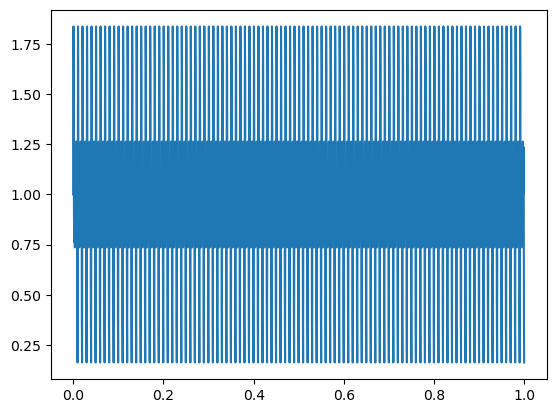

In [7]:
# shift the signal above 0
signal1 = signal1 + 1
plt.plot(t, signal1)

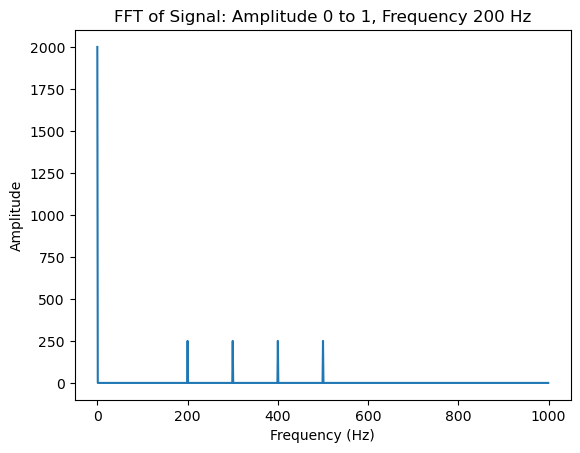

In [8]:
# fft of the signal1
fft1 = np.fft.fft(signal1)
# plot 0-1000Hz fft for signal1
plt.plot(np.abs(fft1[0:1000]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Signal: Amplitude 0 to 1, Frequency 200 Hz')
plt.show()

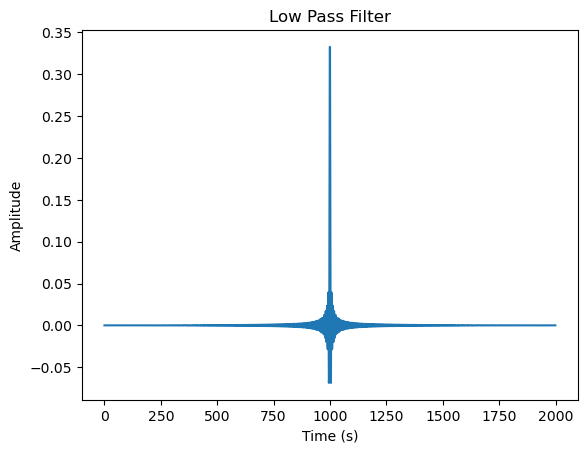

In [9]:
# symmetric low pass fir filter to firlter out the signal above 350Hz
# filter order = 100
# cutoff frequency = 350Hz
# sampling rate = 2000Hz
# window = hamming
# filter type = low pass
# filter = firwin
from scipy.signal import firwin, freqz, lfilter

# Change this to 100 to downsample and visualize. 
# Also note that the numtaps should be cosistent for the filter to work.
# So keep it same as the sampling rate.
#numtaps = 100
numtaps = 2000
cutoff = 350
nyq = sampling_rate/2
taps = firwin(numtaps, cutoff/nyq, window='hamming', pass_zero=True)
# plot the filter
plt.plot(taps)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Low Pass Filter')
plt.show()

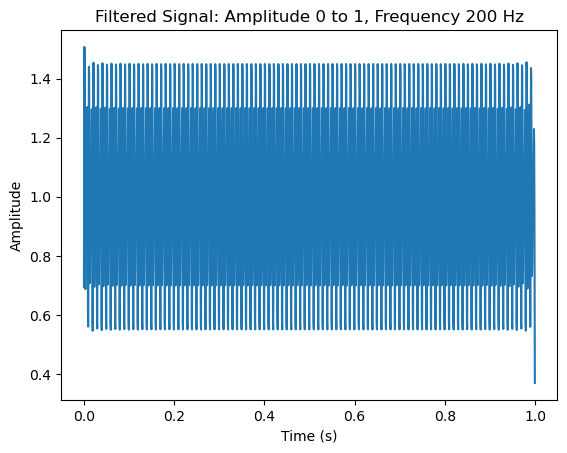

In [10]:
# convolve np.convolve(signal1, taps, mode='same')
# plot the filtered signal
import numpy as np
filtered_signal1 = np.convolve(signal1, taps, mode='same')
plt.plot(t, filtered_signal1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal: Amplitude 0 to 1, Frequency 200 Hz')
plt.show()

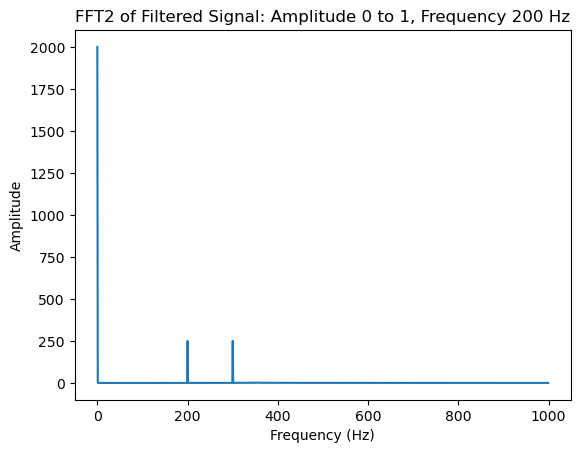

In [11]:
# plot the fft of the filtered signal
fft2 = np.fft.fft(filtered_signal1)
plt.plot(np.abs(fft2[0:1000]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT2 of Filtered Signal: Amplitude 0 to 1, Frequency 200 Hz')
plt.show()

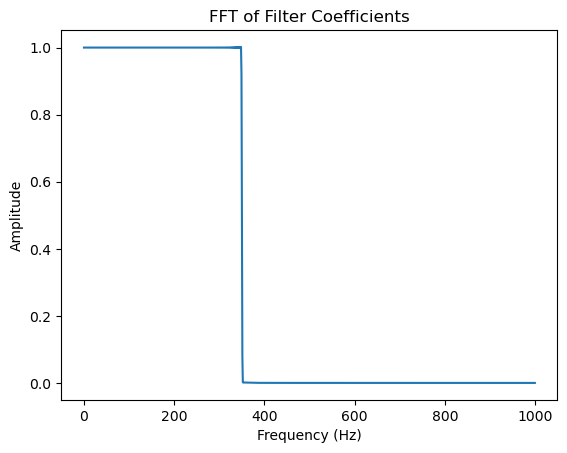

In [12]:
# take the fft of the filtered coefficients
fft3 = np.fft.fft(taps)
plt.plot(np.abs(fft3[0:1000]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Filter Coefficients')
plt.show()

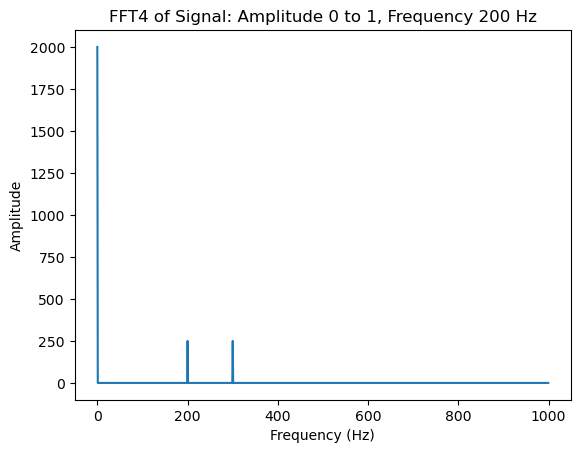

In [13]:
# multipy fft1 and fft3
fft4 = fft1 * fft3
plt.plot(np.abs(fft4[0:1000]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT4 of Signal: Amplitude 0 to 1, Frequency 200 Hz')
plt.show()
